In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import pandas as pd 
import json 
import matplotlib.pyplot as plt
import openweathermapy.core as owm
import requests
import numpy as np
from citipy import citipy
import time
import urllib.parse


In [5]:
n = np.arange(0,200)
lat = [np.random.randint(-90,90) for x in n]
lon = [np.random.randint(-180,180) for x in n]
cities = [citipy.nearest_city(lat[x],lon[x]) for x in n]
citname = [x.city_name for x in cities]

In [6]:
url_city = [ city.replace(' ','+') for city in citname]

In [7]:
api_key = "84118e42b3d86b37974bdac41f70ba65"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "IMPERIAL"

# Build query URL
target_url = [url + "appid=" + api_key + "&units=" + units + "&q=" + city for city in url_city]

In [8]:
data_all=[requests.get(url).json() for url in target_url]

In [9]:
temp = []
lat = []
humid = []
cloud = []
wind = []

for x in data_all:
    try:
        temp_get = x.get('main').get('temp')
        lat_get = x.get('coord').get('lat')
        humid_get = x.get('main').get('humidity')
        cloud_get = x.get('clouds').get('all')
        wind_get = x.get('wind').get('speed')
        
        temp.append(temp_get)
        humid.append(humid_get)
        cloud.append(cloud_get)
        wind.append(wind_get)
        lat.append(lat_get)
        
    except:
        continue

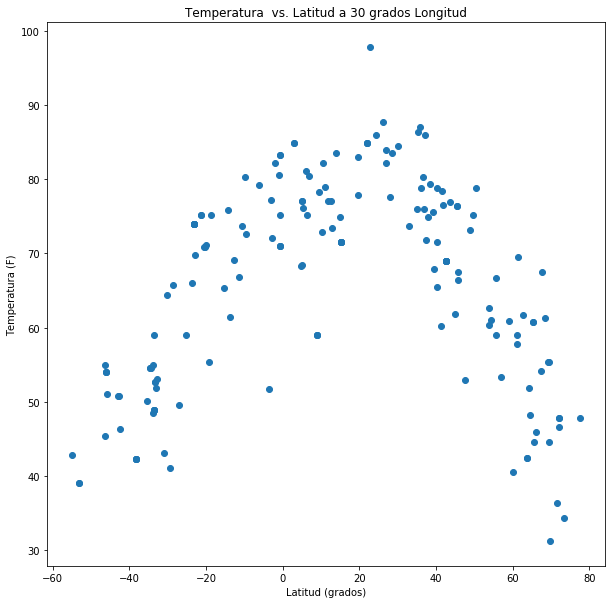

In [12]:
plt.figure(figsize=(10,10))
plt.title("Temperatura  vs. Latitud ")
plt.xlabel('Latitud (grados)')
plt.ylabel('Temperatura (F)')
plt.scatter(lat,temp)
plt.show()

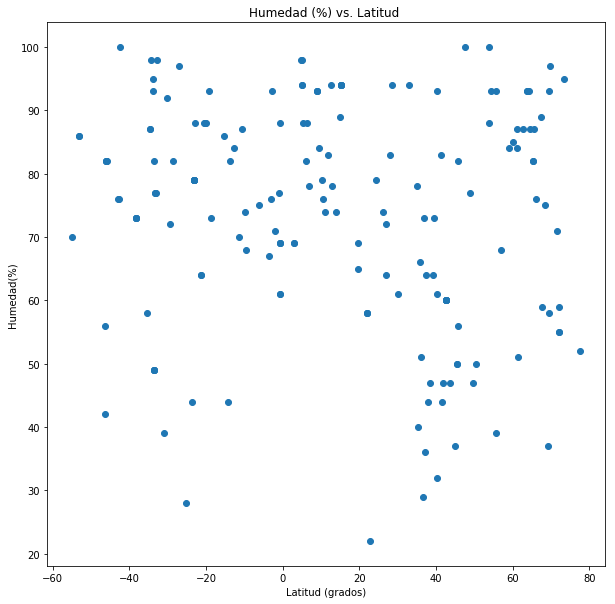

In [14]:
plt.figure(figsize=(10,10))
plt.title("Humedad (%) vs. Latitud ")
plt.xlabel('Latitud (grados)')
plt.ylabel('Humedad(%)')
plt.scatter(lat,humid)
plt.show()

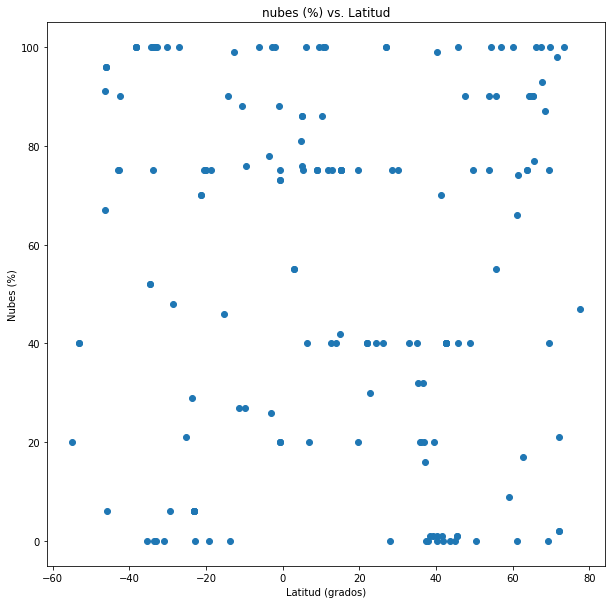

In [15]:
plt.figure(figsize=(10,10))
plt.title("nubes (%) vs. Latitud")
plt.xlabel('Latitud (grados)')
plt.ylabel('Nubes (%)')
plt.scatter(lat,cloud)
plt.show()

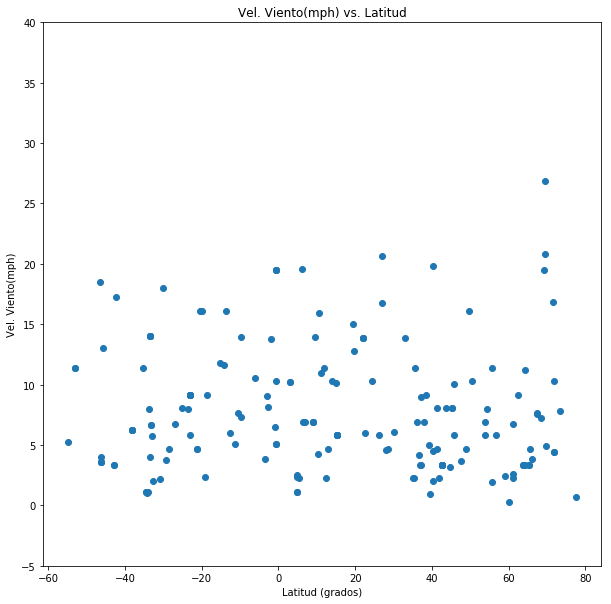

In [16]:
plt.figure(figsize=(10,10))
plt.title("Vel. Viento(mph) vs. Latitud")
plt.xlabel('Latitud (grados)')
plt.ylabel('Vel. Viento(mph)')
plt.ylim(-5,40)
plt.scatter(lat,wind)
plt.show()